1) Problem Statement:-Predicting Customer Churn in a Telecom Company
2) Why this problem :-The customer churn problem is a critical issue for many businesses, particularly in industries where customers subscribe to ongoing services or products, such as telecommunications, software as a service (SaaS), subscription-based businesses, and more. a) Revenue Impact b) Market Competition c) Operational Improvements
3) Solution :-To address the customer churn problem effectively, you can follow these steps in your solution: a) Data Collection and Preparation b) Feature Engineering c) Train-Test Split d) Model Selection and Training e) Model Interpretation etc
4) Model applying :-logistic Regression and Support vector machine(SVM)
5) Overall Conclusion for Logistic regression :-The logistic regression model demonstrates reasonable predictive performance in identifying customer churn. It achieved an accuracy of approximately 80.64%, indicating that it can make correct predictions for a large portion of the test dataset. However, there is room for improvement, especially in correctly identifying churned customers (class 1.0). The model's precision, recall, and F1-score for class 1.0 (churn) are relatively lower compared to class 0.0 (non-churn). Depending on the business's priorities and objectives, further model tuning, feature engineering, or trying different algorithms may be considered to enhance the predictive performance and reduce churn more effectively. It is essential to consider the business context and potential costs associated with false positives and false negatives when interpreting the model's performance and deciding on next steps. Continuous monitoring and feedback can help fine-tune the model and implement effective retention strategies.
5) Overall Conclusion for SVM : The SVM model's performance for predicting customer churn is highly imbalanced and inadequate. While it shows perfect accuracy in predicting non-churn cases (class 0.0), it completely fails to identify churned customers (class 1.0). The model's precision, recall, and F1-score for class 1.0 are all extremely low, indicating that it does not provide any meaningful predictions for churn. The model's inability to detect churn (class 1.0) renders it unsuitable for practical use in predicting customer churn. The lack of any true positive predictions for churn shows that the model could not learn meaningful patterns to distinguish churn from non-churn customers.

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()
#there are no missing values in the data
#We need to change the object type's

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.describe()
#this only shows for int64/float64 columns
#tenure has slight positive skewness
#MonthlyCharges has silght negative skewness

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


<Axes: xlabel='gender', ylabel='count'>

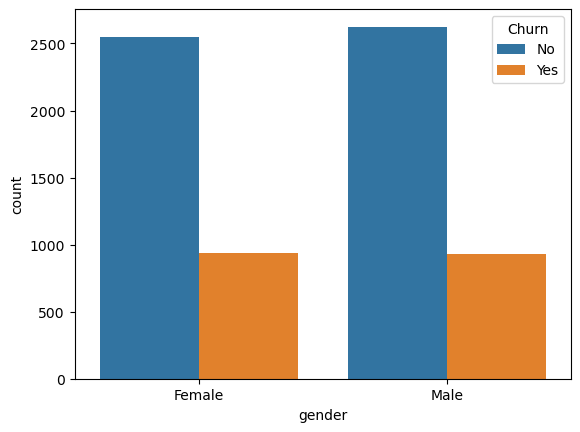

In [5]:
sns.countplot(x="gender",hue="Churn",data=df)   
#churns are almost similar in both the genders 

<Axes: xlabel='Contract', ylabel='count'>

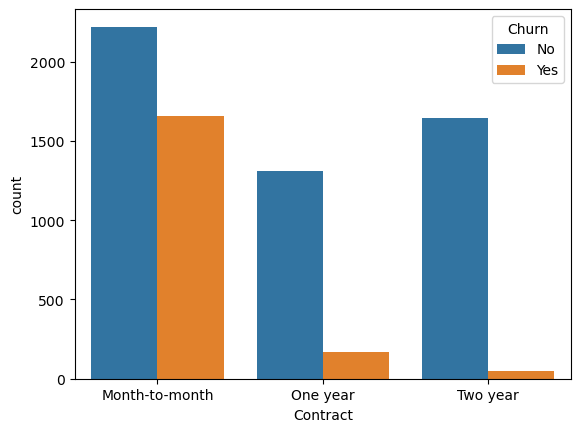

In [6]:
sns.countplot(x="Contract",hue="Churn",data=df)   
# Churn are more in month to month contract plans as compared to other plans

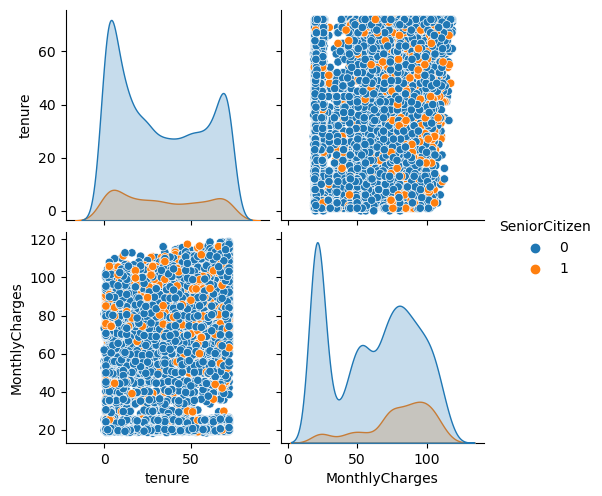

In [7]:
sns.pairplot(df,hue="SeniorCitizen")  
#the data is overlapping and imbalanced

Preprossing :-
Changing every object type column to int64/float64 using OrdinalEncoding


In [8]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df[["gender","Partner"]]=oe.fit_transform(df[["gender","Partner"]])
df[["Dependents","PhoneService"]]=oe.fit_transform(df[["Dependents","PhoneService"]])
df[["MultipleLines","InternetService"]]=oe.fit_transform(df[["MultipleLines","InternetService"]])
df[["OnlineSecurity","OnlineBackup"]]=oe.fit_transform(df[["OnlineSecurity","OnlineBackup"]])
df[["DeviceProtection","TechSupport"]]=oe.fit_transform(df[["DeviceProtection","TechSupport"]])
df[["StreamingTV","StreamingMovies"]]=oe.fit_transform(df[["StreamingTV","StreamingMovies"]])
df[["Contract","PaperlessBilling"]]=oe.fit_transform(df[["Contract","PaperlessBilling"]])
df[["PaymentMethod","TotalCharges"]]=oe.fit_transform(df[["PaymentMethod","TotalCharges"]])
df[["Churn","customerID"]]=oe.fit_transform(df[["Churn","customerID"]])


In [9]:
df.info()
# Every object type column converted to int64/float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   float64
 1   gender            7043 non-null   float64
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   float64
 4   Dependents        7043 non-null   float64
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   float64
 7   MultipleLines     7043 non-null   float64
 8   InternetService   7043 non-null   float64
 9   OnlineSecurity    7043 non-null   float64
 10  OnlineBackup      7043 non-null   float64
 11  DeviceProtection  7043 non-null   float64
 12  TechSupport       7043 non-null   float64
 13  StreamingTV       7043 non-null   float64
 14  StreamingMovies   7043 non-null   float64
 15  Contract          7043 non-null   float64
 16  PaperlessBilling  7043 non-null   float64


Dropping customerId as it is not relavent to us

In [10]:
df.drop('customerID',axis=1,inplace=True)

In [11]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [12]:
# Taking every column as features except churn
# Taking Churn as target
features=df.iloc[:,:-1]
target=df.iloc[:, -1]

Applying Machine Learning model 
Logistic regression

In [13]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(features,target,random_state=1,test_size=0.3)

In [14]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)

In [15]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

ac=accuracy_score(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)


print(f"AC :   {ac}\nCM :\n {cm}\nCR : {cr}")

AC :   0.8064363464268812
CM :
 [[1410  175]
 [ 234  294]]
CR :               precision    recall  f1-score   support

         0.0       0.86      0.89      0.87      1585
         1.0       0.63      0.56      0.59       528

    accuracy                           0.81      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.80      0.81      0.80      2113



Our Machine Learning model's scores
Accuracy = 80.64%
F1-score = 87%
Precision  = 86%
Recall = 89%

Applying Machine Learning Model
Support Vector Machine(SVM)

In [16]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(features,target,random_state=1,test_size=0.4)

In [17]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(xtrain,ytrain)
ypred=svc.predict(xtest)

In [18]:
from sklearn.metrics import confusion_matrix,classification_report

cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)

print(f"\nCM : \n {cm}\nCR : {cr}")


CM : 
 [[2098    0]
 [ 720    0]]
CR :               precision    recall  f1-score   support

         0.0       0.74      1.00      0.85      2098
         1.0       0.00      0.00      0.00       720

    accuracy                           0.74      2818
   macro avg       0.37      0.50      0.43      2818
weighted avg       0.55      0.74      0.64      2818



Our Machine Learning model's scores
Accuracy = 74%
F1-score = 85%
Precision = 74%
Recall = 100%